In [2]:
%matplotlib inline

import pandas
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

0.15063979580435419

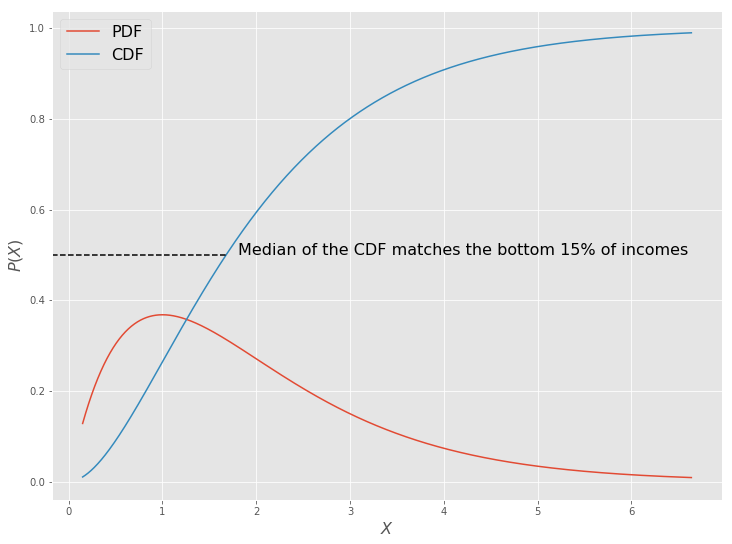

In [33]:
from scipy.stats import beta, gamma
# inspired by https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

a = 2
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a) , 1000)

plt.figure(figsize=(12, 9))
plt.plot(x, gamma.pdf(x, a), label='PDF')
plt.plot(x, gamma.cdf(x, a), label='CDF')
plt.axhline(y=0.5, xmin=0.0, xmax=0.26, ls='--', color='black')
plt.annotate(r'Median of the CDF matches the bottom {p:d}% of incomes'.format(p=int(100.0 / gamma.ppf(0.99, a))), 
             (1.8, 0.5), size=16)
plt.legend(fontsize=16)
plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$P(X)$', size=16)
plt.show()


In [35]:
gamma.cdf(0.5 * gamma.ppf(0.05, a) + 0.95 * gamma.ppf(0.95, a), a)

0.94748386918040806

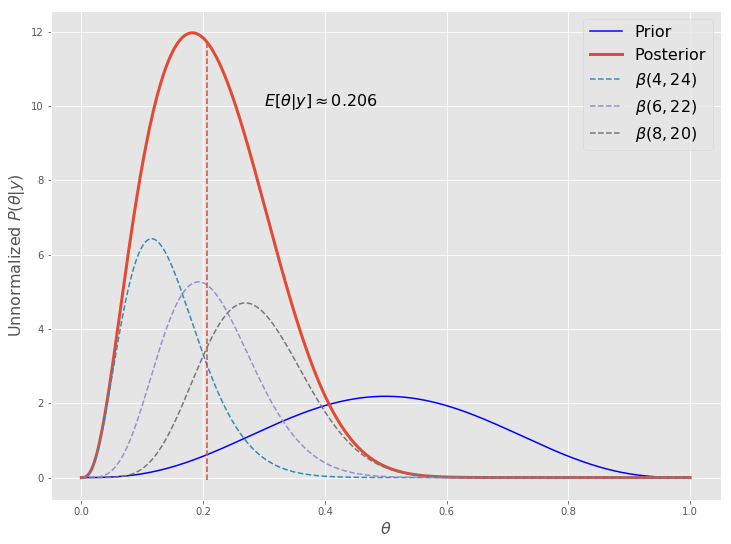

In [19]:
def second_posterior(x):
    return beta.pdf(x, 4, 24) + beta.pdf(x, 6, 22) + beta.pdf(x, 8, 20)

x = np.linspace(0, 1, 1000)
y = second_posterior(x)

plt.figure(figsize=(12, 9))
plt.plot(x, beta.pdf(x, 4, 4), color='blue', label='Prior')
plt.plot(x, y, lw=3, label='Posterior')
plt.plot(x, beta.pdf(x, 4, 24), ls='--', label=r'$\beta(4,24)$')
plt.plot(x, beta.pdf(x, 6, 22), ls='--', label=r'$\beta(6,22)$')
plt.plot(x, beta.pdf(x, 8, 20), ls='--', label=r'$\beta(8,20)$')
plt.axvline(x=0.206, ymin=0.04, ymax=0.94, ls='--')
plt.annotate(r'$E[\theta|y] \approx 0.206$', (0.3, 10), size=16)
plt.legend(loc=1, fontsize=16)
plt.xlabel(r'$\theta$', size=16)
plt.ylabel(r'Unnormalized $P(\theta|y)$', size=16)
plt.show()

In [25]:
from scipy.misc import comb
from scipy.special import beta as B

def beta_binomial(i, n, alpha, beta):
    return comb(n, i) * B(alpha + i, beta + n - i) / B(alpha, beta)

print('Sanity check summing over y in [0, 10]:', sum([beta_binomial(i, 10, 4, 4) for i in range(11)]))

for i in range(3):
    print(i, ':', beta_binomial(i, 10, 4, 4))

Sanity check summing over y in [0, 10]: 1.0
0 : 0.0147058823529
1 : 0.0452488687783
2 : 0.0848416289593


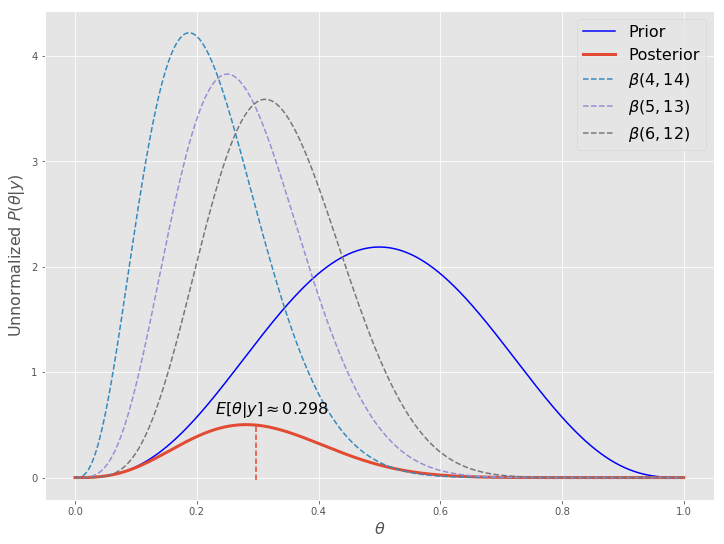

In [42]:
def final_posterior(x, i=(0, 1, 2), n=10, a=4, b=4):
    return np.sum([beta_binomial(i_val, n, a, b) * beta.pdf(x, 4 + i_val, 4 + n - i_val) for i_val in i], axis=0)

x = np.linspace(0, 1, 1000)
y = final_posterior(x)

plt.figure(figsize=(12, 9))
plt.plot(x, beta.pdf(x, 4, 4), color='blue', label='Prior')
plt.plot(x, y, lw=3, label='Posterior')
plt.plot(x, beta.pdf(x, 4, 14), ls='--', label=r'$\beta(4,14)$')
plt.plot(x, beta.pdf(x, 5, 13), ls='--', label=r'$\beta(5,13)$')
plt.plot(x, beta.pdf(x, 6, 12), ls='--', label=r'$\beta(6,12)$')
plt.axvline(x=0.298, ymin=0.04, ymax=0.15, ls='--')
plt.annotate(r'$E[\theta|y] \approx 0.298$', (0.23, 0.60), size=16)
plt.legend(loc=1, fontsize=16)
plt.xlabel(r'$\theta$', size=16)
plt.ylabel(r'Unnormalized $P(\theta|y)$', size=16)
plt.show()

In [35]:
sum(y) / 2 - sum(y[:298])

-0.11163547473331903

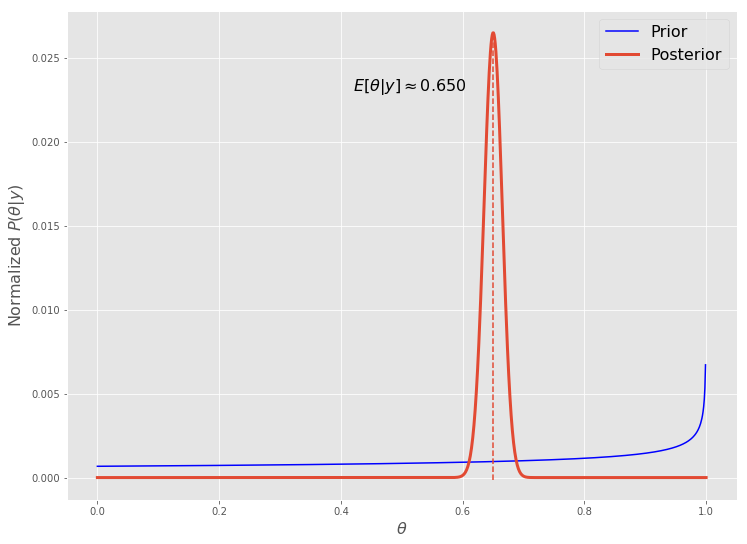

In [77]:
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 9))
plt.plot(x[:999], beta.pdf(x, 1, 2.0/3)[:999]/sum(beta.pdf(x, 1, 2.0/3)[:999]), color='blue', label='Prior')
plt.plot(x, beta.pdf(x, 651, 350 + 2.0/3)/sum(beta.pdf(x, 651, 350 + 2.0/3)), lw=3, label='Posterior')
plt.axvline(x=0.65, ymin=0.04, ymax=0.95, ls='--')
plt.annotate(r'$E[\theta|y] \approx 0.650$', (0.42, 0.023), size=16)
plt.legend(loc=1, fontsize=16)
plt.xlabel(r'$\theta$', size=16)
plt.ylabel(r'Normalized $P(\theta|y)$', size=16)
plt.show()

In [73]:
y = beta.pdf(x, 651, 350 + 2.0/3)
sum(y)/2 - sum(y[:650])
x[650]

0.65065065065065064

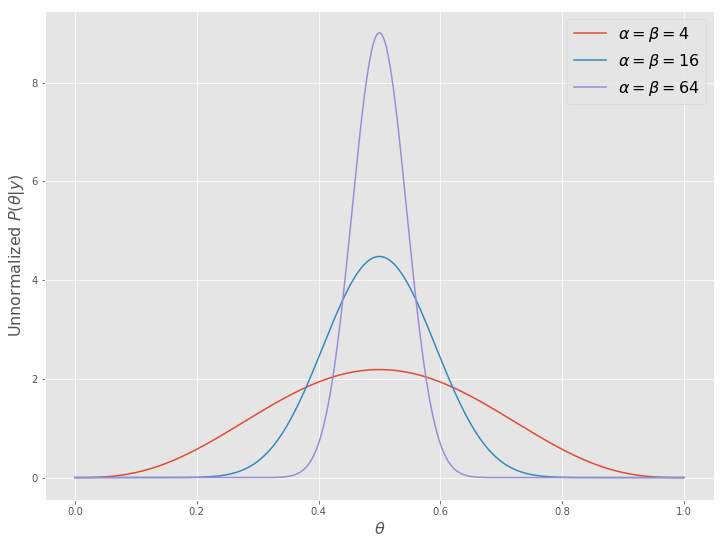

In [80]:
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(12, 9))
plt.plot(x, beta.pdf(x, 4, 4), label=r'$\alpha=\beta=4$')
plt.plot(x, beta.pdf(x, 16, 16), label=r'$\alpha=\beta=16$')
plt.plot(x, beta.pdf(x, 64, 64), label=r'$\alpha=\beta=64$')
plt.legend(loc=1, fontsize=16)
plt.xlabel(r'$\theta$', size=16)
plt.ylabel(r'Unnormalized $P(\theta|y)$', size=16)
plt.show()